In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit

abc


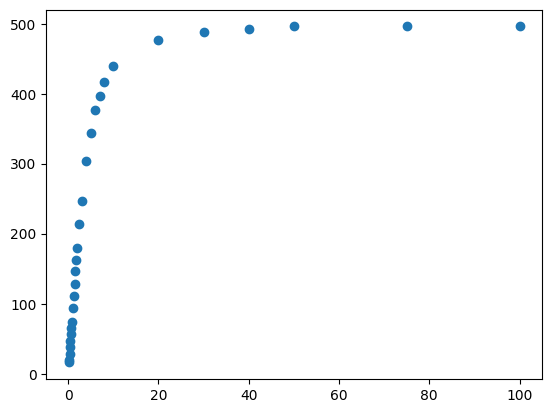

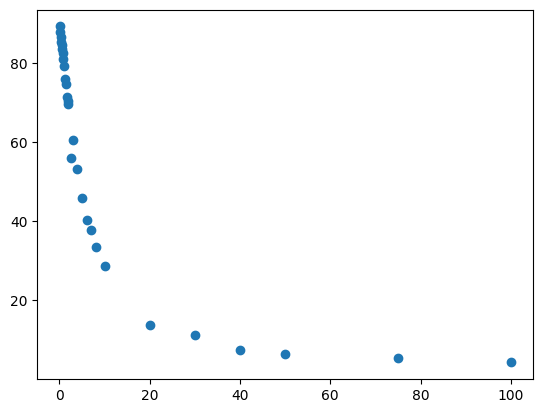

In [3]:
# HOCHPASS DURCHLASSKURVE
hochpassIn = np.array([5,])
#in v
hochpassOut = np.array([16, 19.4, 28.6, 38.0, 47.2, 56.4, 65.2, 74, 93.6, 111, 128, 146, 162, 180, 214, 246, 304, 344, 376, 396, 416, 440, 476, 488, 492, 496, 496, 496

])
print("abc")
#in mV
frequenz = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.00, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 20.0, 30.0, 40.0, 50.0, 75.0, 100])
#in kHz
phasenverschiebung = np.array([89.2, 87.8, 86.6, 85.4, 84.6, 83.4, 82.4, 80.9, 79.2, 75.9,  74.6, 71.5, 70.4, 69.6, 56.1, 60.5, 53.2,  45.9, 40.3, 37.8, 33.6, 28.8, 13.9, 11.2, 7.5, 6.5, 5.4, 4.32 ])

plt.scatter(frequenz, hochpassOut)
plt.subplots()
plt.scatter(frequenz, phasenverschiebung)

In [25]:
##schwingkreis
#mV
frequenzSchwingkreis = np.array([50.0,
                      55,
                     60, 
                     62,
                      64,
                      66,
                      67,
                      68,
                      68.5,
                      69,
                      69.5,
                      70,
                      70.5,
                      71,
                      72,
                      73,
                      74,
                      76,
                      78,
                      80,
                      85,
                      90])

uOutSchwingkreis = np.array([133,
                 180,
                 254,
                 292,
                 334,
                 378,
                 394,
                 408,
                 412,
                 416,
                 416,
                 416,
                 412,
                 408,
                 396,
                 384,
                 364,
                 332,
                 300,
                 268,
                 210,
                 172
                 ])

phaseSchwingkreis = np.array([71,
                  66,
                  53.5,
                  44.6,
                  36.0,
                  24.7,
                  18,
                  10.7,
                  8.5,
                  3.98,
                  0,
                  -4,
                  -6.5,
                  -11.2,
                  -16.6,
                  -21.5,
                  -27.2,
                  -37.2,
                  -42.6,
                  -50.6,
                  -61.1,
                  -67.4

                  ])


uInSchwingkreis = 4.96

uDataSchwingkreisRelToIn = 0.001 * uOutSchwingkreis / uInSchwingkreis
fDataSchwingkreisHz = frequenzSchwingkreis * 1000

phiDataSchwingkreisRad = 2 * np.pi * fDataSchwingkreisHz / 360.0




In [ ]:
def durchgangTheoriekurve(fData, measureRhoParam, rhoParam, resoParam):
    return measureRhoParam * fData / np.sqrt(rhoParam**2.0 + (fData**2.0 - resoParam**2.0)**2.0)

def phaseTheoriekurve(fData, rhoParam, resoParam):
    return np.arctan((fData **2.0 - resoParam**2.0) / (rhoParam * fData))

durchgangSchwingkreisFitRes = fit(durchgangTheoriekurve, fDataSchwingkreisHz, uDataSchwingkreisRelToIn)
phaseSchwingkreisFitRes = fit()

Text(0, 0.5, '$\\frac{U_A}{U_E}$ in %')

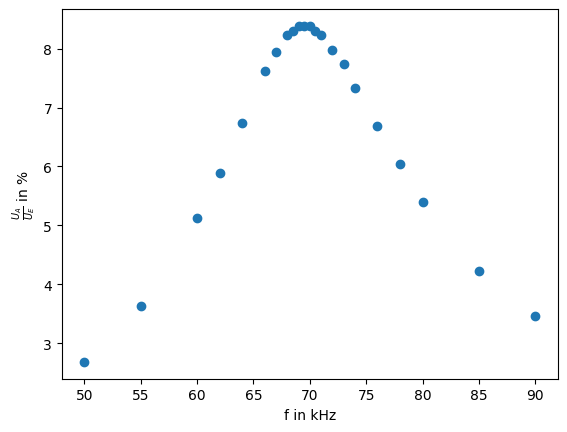

In [22]:
from scipy.signal import find_peaks as peaks
plt.scatter(fDataSchwingkreisHz / 1000, uDataSchwingkreisRelToIn * 100)
plt.xlabel("f in kHz")
plt.ylabel(r"$\frac{U_A}{U_E}$ in %")


Text(0, 0.5, '$\\Delta \\phi$ in °')

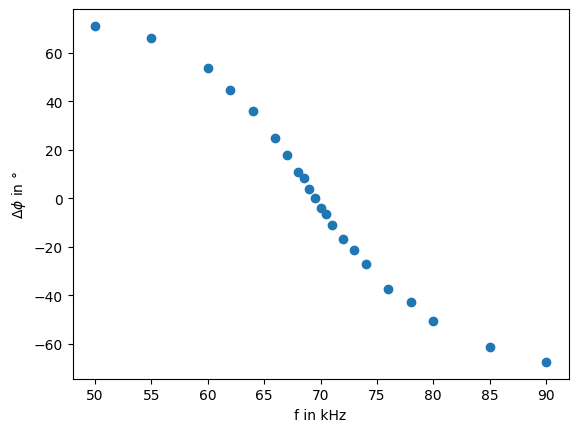

In [24]:
plt.scatter(fDataSchwingkreisHz/1000, phaseSchwingkreis)
plt.xlabel("f in kHz")
plt.ylabel(r"$\Delta \phi$ in °")

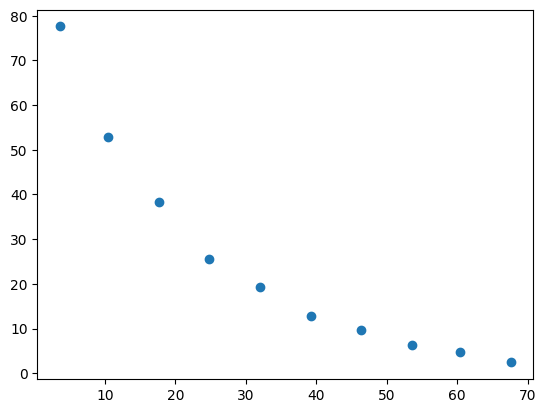

In [17]:
#daempfungskonstante

zeitDaempfungMikroSekunden = np.array([3.6,
                 10.4,
                 17.6,
                 24.8,
                 32,
                 39.2,
                 46.4,
                 53.6,
                 60.4,
                 67.6
                 ])

amplitudeDaempfungMilliVolt = np.abs(np.array([77.6,
                              -52.8,
                              38.4,
                              -25.6,
                              19.4,
                              -12.8,
                              9.6,
                              -6.4,
                              4.8,
                              -2.4
                              ]))


plt.scatter(zeitDaempfungMikroSekunden, amplitudeDaempfungMilliVolt)